In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json


# Convert JSON to DataFrame
df = pd.read_csv("Employee-Attrition.csv")

# Convert categorical Attrition to numeric for analysis
df["Attrition_Flag"] = df["Attrition"].map({"Yes": 1, "No": 0})

# Display first few rows
print(df.head(2))


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   

   ...  StandardHours StockOptionLevel  TotalWorkingYears  \
0  ...             80                0                  8   
1  ...             80                1                 10   

   TrainingTimesLastYear  WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
0                      0                1              6                   4   
1                      3                3             10                   7   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition_Flag  
0                       0                    

C:\Users\adeso\AppData\Local\Temp\ipykernel_6160\1394729183.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Attrition", palette="coolwarm")


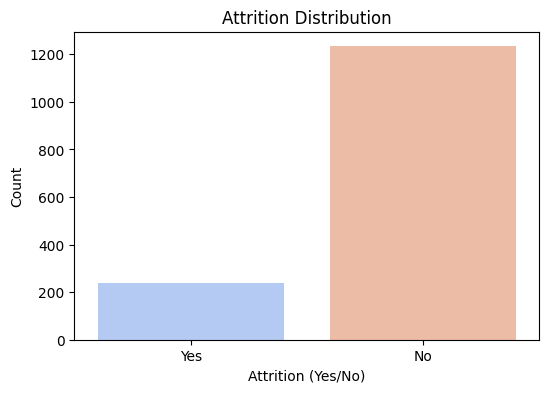

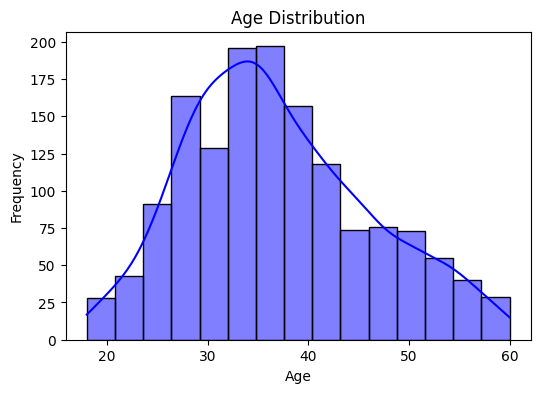

C:\Users\adeso\AppData\Local\Temp\ipykernel_6160\1394729183.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="JobSatisfaction", palette="viridis")


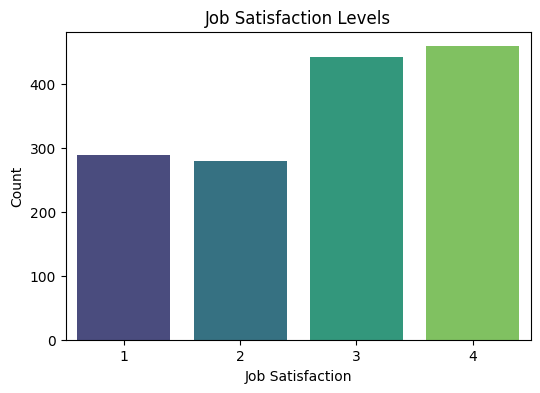

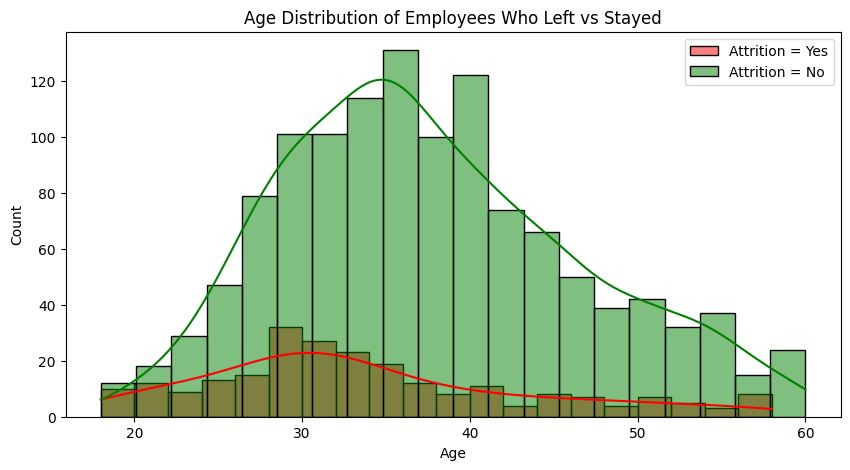

In [3]:
# Univariate Analysis

# Attrition Distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Attrition", palette="coolwarm")
plt.title("Attrition Distribution")
plt.xlabel("Attrition (Yes/No)")
plt.ylabel("Count")
plt.show()

# Age Distribution

plt.figure(figsize=(6,4))
sns.histplot(df["Age"], bins=15, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Job Satisfaction
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="JobSatisfaction", palette="viridis")
plt.title("Job Satisfaction Levels")
plt.xlabel("Job Satisfaction")
plt.ylabel("Count")
plt.show()

# Convert Attrition to categorical (Yes=1, No=0) for better visualization
df['AttritionBinary'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Plot Age Distribution for Attrition vs Non-Attrition
plt.figure(figsize=(10, 5))
sns.histplot(df[df['Attrition'] == 'Yes']['Age'], bins=20, kde=True, color='red', label="Attrition = Yes")
sns.histplot(df[df['Attrition'] == 'No']['Age'], bins=20, kde=True, color='green', label="Attrition = No")
plt.legend()
plt.title("Age Distribution of Employees Who Left vs Stayed")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


C:\Users\adeso\AppData\Local\Temp\ipykernel_6160\1469421481.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Attrition", y="MonthlyIncome", palette="coolwarm")


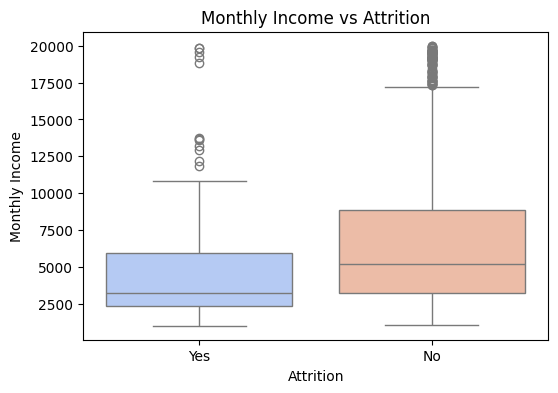

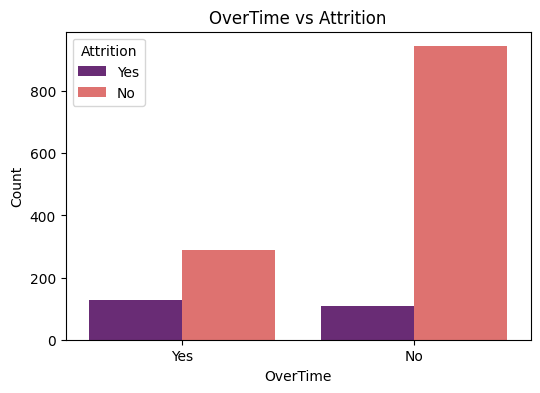

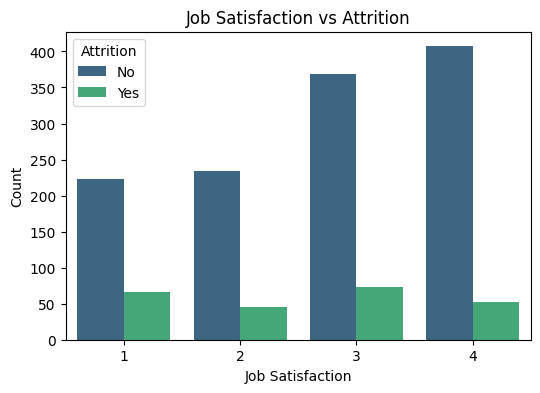

In [4]:
# Bivariate Analysis

# Attrition vs. Monthly Income
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Attrition", y="MonthlyIncome", palette="coolwarm")
plt.title("Monthly Income vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Monthly Income")
plt.show()

# Attrition vs. Overtime
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="OverTime", hue="Attrition", palette="magma")
plt.title("OverTime vs Attrition")
plt.xlabel("OverTime")
plt.ylabel("Count")
plt.legend(title="Attrition")
plt.show()

# Attrition vs. Job Satisfaction
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="JobSatisfaction", hue="Attrition", palette="viridis")
plt.title("Job Satisfaction vs Attrition")
plt.xlabel("Job Satisfaction")
plt.ylabel("Count")
plt.legend(title="Attrition")
plt.show()



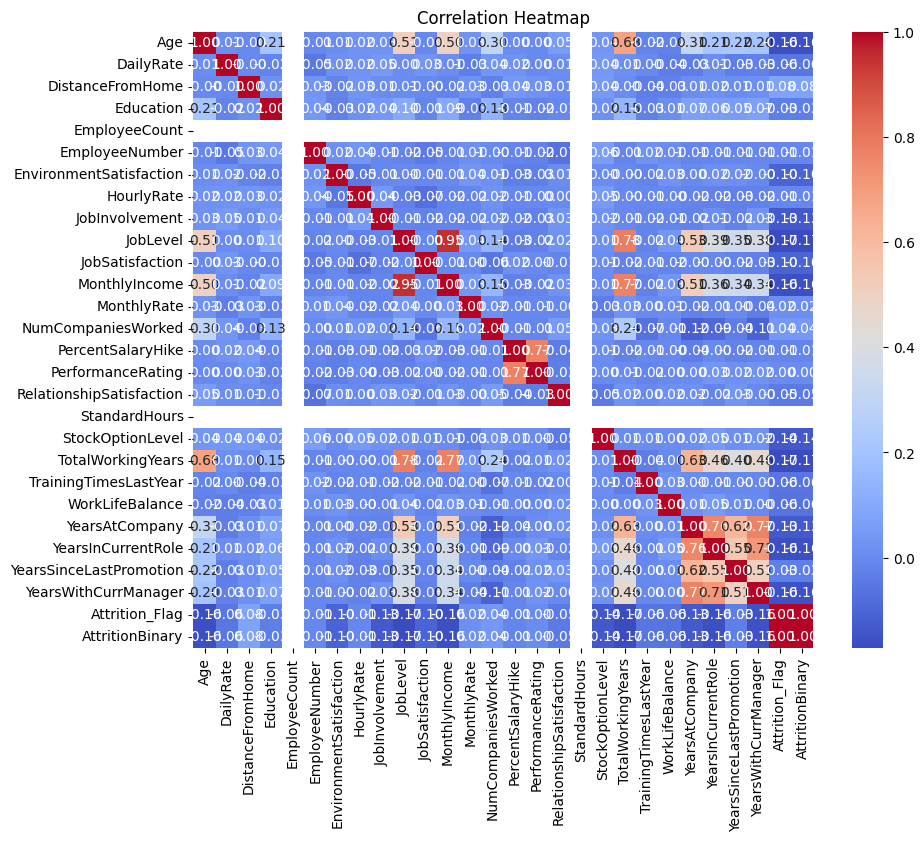

In [5]:
#  Multivariate Analysis


plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
